## Pytorch Tensor

Numpy 와 매우 유사

In [13]:
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [17]:
np_array = np.array(data)

x_np_1 = torch.tensor(np_array) # Copy
x_np_2 = torch.as_tensor(np_array) # View
x_np_3 = torch.from_numpy(np_array) # View

np_again = x_np_1.numpy()

type(np_array), type(x_np_1), type(x_np_2), type(np_again)

(numpy.ndarray, torch.Tensor, torch.Tensor, numpy.ndarray)

In [18]:
a = torch.ones(3,3)
b = torch.zeros(2,3)
c = torch. full((2,3),2)
d = torch.empty(2,3)

a,b,c,d

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 tensor([[2, 2, 2],
         [2, 2, 2]]),
 tensor([[4.5918e-39, 4.5000e-39, 4.2246e-39],
         [1.0286e-38, 1.0653e-38, 1.0194e-38]]))

In [19]:
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c,3)
h = torch.empty_like(c)

e,f,g,h

(tensor([[0, 0, 0],
         [0, 0, 0]]),
 tensor([[1, 1, 1],
         [1, 1, 1]]),
 tensor([[3, 3, 3],
         [3, 3, 3]]),
 tensor([[0, 0, 0],
         [0, 0, 0]]))

In [20]:
i = torch.eye(3)
j = torch.arange(10)
k = torch.rand(2,2)
l = torch.randn(2,2)

i,j,k,l

(tensor([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([[0.9247, 0.2198],
         [0.3857, 0.4947]]),
 tensor([[ 0.7487, -0.0726],
         [-0.2962, -0.5942]]))

Tensor 의 속성

In [21]:
tensor = torch.rand(3,4)

tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

In [22]:
tensor = tensor.reshape(4,3)
tensor = tensor.int()
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
tensor.device

device(type='cpu')

Indexing 과 Slicing

In [25]:
a = torch.arange(1,13).reshape(3,4)
a

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

In [26]:
a[1], a[0,-1], a[:2, 2:]

(tensor([5, 6, 7, 8]),
 tensor(4),
 tensor([[3, 4],
         [7, 8]]))

Tensor 연산

In [28]:
x = torch.tensor([[1,2], [3,4]], dtype=torch.float32)
y = torch.tensor([[5,6], [7,8]], dtype=torch.float32)

In [29]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(torch.add(x,y))
print(torch.subtract(x,y))
print(torch.multiply(x,y))
print(torch.divide(x,y))
print(torch.matmul(x,y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [30]:
# in-place 연산 : 연산_ 가 붙으면 연산의 결과가 input var 에 덮어 씌워짐
print(x.add(y))
print(x)
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [32]:
z = torch.arange(1,11).reshape((2,5))

sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)

print(sum1)
print(sum2)

tensor([ 7,  9, 11, 13, 15])
tensor([15, 40])


## Dataset / Dataloader

Data 를 처리하여 model 에 공급하는 방법으로 Pytorch 에서는 Dataset 과 DataLoader 를 제공합니다.
Dataset 은 data와 label 을 저장하고, DataLoader 는 Dataset 을 model 에 공급 할 수 있도록 iterable 객체로 감싸줍니다.

In [196]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,Lambda,Compose
import  torchvision.transforms as tr

In [39]:
training_data = datasets.FashionMNIST(
    root='data', # 저장 할 디렉토리 이름
    train=True, # True 면 train, False 면 test
    download=True, 
    transform=ToTensor(), # transform: Data 전처리, ToTensor : 0~1 로 scaling 하여, tensor 자료형으로 변환
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

training_data

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

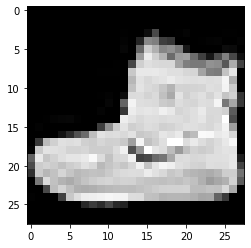

In [40]:
img, label = training_data[0]
plt.imshow(img.squeeze(),cmap='gray')

DataLoader 만들기

In [44]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


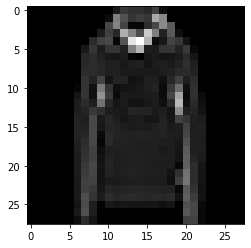

In [45]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze() # squeeze 값이 1 인 dimension 을 없애여 dimension 을 축소함
label = train_labels[0]
plt.imshow(img,cmap='gray')

Custom Dataset 만들기

In [203]:
# 생성자, __len__, __geitem__ method 선언 필수
class CustomDataset(Dataset):
    def __init__(self, np_data, transform=None): #transform : data 전처리
        self.data = np_data
        self.transform = transform
        self.len = np_data.shape[0] #Data 개수 
    def __len__(self):
        return self.len
    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)        
        return sample

In [204]:
def square(sample):
    return sample ** 2
trans = tr.Compose([square]) # Def 를 복수로 가능

np_data = np.arange(10)

custom_dataset = CustomDataset(np_data, transform=trans)

In [205]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [206]:
for _ in range(3):
    for data in custom_dataloader:
        print(data)
    print('='*20)

tensor([4, 0], dtype=torch.int32)
tensor([36,  9], dtype=torch.int32)
tensor([25, 49], dtype=torch.int32)
tensor([64, 16], dtype=torch.int32)
tensor([ 1, 81], dtype=torch.int32)
tensor([64,  1], dtype=torch.int32)
tensor([49, 16], dtype=torch.int32)
tensor([4, 0], dtype=torch.int32)
tensor([81, 25], dtype=torch.int32)
tensor([ 9, 36], dtype=torch.int32)
tensor([81, 49], dtype=torch.int32)
tensor([64,  0], dtype=torch.int32)
tensor([ 1, 36], dtype=torch.int32)
tensor([9, 4], dtype=torch.int32)
tensor([16, 25], dtype=torch.int32)


## Model

In [208]:
# device 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


Model class 만들기 (Tensorflow 의 subclass 와 유사)

In [210]:
class NeuralNetwork(nn.Module): #nn.Module 을 상속
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128), # Linear : Tensorflow 의 Dense 역할, layer input size 를 parameter 로 받음
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,10)
        )
        
    def forward(self, x): # Tensorflow subclass model 의 Call 역할
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [211]:
# Model instance 생성, device 설정
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [213]:
# 가상의 data 를 만들어서 예측해보기
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


## Training / Validation

Loss Function

In [214]:
# 손실 함수를 초기화합니다.
loss_fn = nn.CrossEntropyLoss()

Optimizer

In [217]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # model_parameters : model 의 parameter 로 weight update 할 것임

In [227]:
# Training 을 위한 함수

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader): # Batch 단위로 for 구문 진행
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad() # Gradient 가 남아있는 것을 Clean-up함
        loss.backward() # back propagation 진행
        optimizer.step() # weight 와 bias 를 update 함
        
        if batch % 100 ==0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d} / {size:>5d}]")
            
# Test 를 위한 함수
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) # 1epoch 당 batch 가 몇 개 인지 계산
    test_loss, correct = 0, 0
    
    with torch.no_grad(): # with 안에서는 gradient 를 계산 하지 않겠다고 선언, Memory 공간을 절약 할 수 있음
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # accuracy 계산 (classifier), item : tensor 중 0 차원 인 것 scalar 인 것을 바로 뽑음
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [228]:
# 학습 진행하기

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------
loss: 2.252361 [    0 / 60000]
loss: 0.801848 [ 6400 / 60000]
loss: 0.588927 [12800 / 60000]
loss: 0.447268 [19200 / 60000]
loss: 0.514876 [25600 / 60000]
loss: 0.607873 [32000 / 60000]
loss: 0.706026 [38400 / 60000]
loss: 0.417796 [44800 / 60000]
loss: 0.603792 [51200 / 60000]
loss: 0.333235 [57600 / 60000]
Test Error: 
 Accuracy: 82.2%, Avg loss: 0.493046 

Epoch 2
-------------------
loss: 0.442822 [    0 / 60000]
loss: 0.372992 [ 6400 / 60000]
loss: 0.447804 [12800 / 60000]
loss: 0.511060 [19200 / 60000]
loss: 0.494787 [25600 / 60000]
loss: 0.385441 [32000 / 60000]
loss: 0.246512 [38400 / 60000]
loss: 0.349359 [44800 / 60000]
loss: 0.539167 [51200 / 60000]
loss: 0.360163 [57600 / 60000]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.441871 

Epoch 3
-------------------
loss: 0.436836 [    0 / 60000]
loss: 0.378071 [ 6400 / 60000]
loss: 0.407030 [12800 / 60000]
loss: 0.352749 [19200 / 60000]
loss: 0.288801 [25600 / 60000]
loss: 0.304127 [32000 / 60000]
loss: 

## Model 저장하고 불러오기

Parameter 만 저장하고 불러오기

In [229]:
# 학습된 model parameter 저장
torch.save(model.state_dict(), 'model_weights.pth')

In [230]:
# 새 Model instance 생성, device 설정
model2 = NeuralNetwork().to(device)
model2

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [232]:
# 저장한 parameter 불러오기
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

In [233]:
# test
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.0%, Avg loss: 0.339223 



Model 전체를 저장하고 불러오기

In [234]:
# 저장하기
torch.save(model, 'model.pth')

In [235]:
# 불러오기
model3 = torch.load('model.pth')

In [236]:
# test
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.0%, Avg loss: 0.339223 



## Tensorboard 사용하여 시각화하기

In [237]:
%load_ext tensorboard

In [239]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('.pytorch')

In [240]:
# 새 Model instance 생성, device 설정
model4 = NeuralNetwork().to(device)
print(model4)

model4.eval()
test_loop(test_dataloader, model4, loss_fn)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Test Error: 
 Accuracy: 10.0%, Avg loss: 2.292225 



In [241]:
X = torch.rand(1, 28, 28, device=device)
writer.add_graph(model4, X)

In [244]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        pred = model(X)
        loss = loss_fn(pred, y)
        
        optimizer.zero_grad() # Gradient 가 남아있는 것을 Clean-up함
        loss.backward() # back propagation 진행
        optimizer.step() # weight 와 bias 를 update 함
        
        if batch % 100 ==0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} [{current:>5d} / {size:>5d}]")
        
        total_loss += loss / len(dataloader)
    return total_loss

In [249]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader) # 1epoch 당 batch 가 몇 개 인지 계산
    model.eval()
    test_loss, correct = 0, 0
    
    with torch.no_grad(): # with 안에서는 gradient 를 계산 하지 않겠다고 선언, Memory 공간을 절약 할 수 있음
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [250]:
parameters = ['Weight1', 'Bias1', 'Weight2', 'Bias2']

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n--------------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)   
    writer.add_scalar('training loss', train_loss, t)
    for param, name in zip(model.parameters(), parameters):
        writer.add_histogram(name, param, t)
    test_loss = test(test_dataloader, model, loss_fn)
    writer.add_scalar('test_loss', test_loss, t)
print("Done!")
        

Epoch 1
--------------------------------------
loss: 0.226353 [    0 / 60000]
loss: 0.230317 [ 6400 / 60000]
loss: 0.213304 [12800 / 60000]
loss: 0.281684 [19200 / 60000]
loss: 0.304613 [25600 / 60000]
loss: 0.433476 [32000 / 60000]
loss: 0.178512 [38400 / 60000]
loss: 0.258644 [44800 / 60000]
loss: 0.238155 [51200 / 60000]
loss: 0.229062 [57600 / 60000]
Test Error: 
 Accuracy: 88.7%, Avg loss: 0.333233 

Epoch 2
--------------------------------------
loss: 0.170424 [    0 / 60000]
loss: 0.293571 [ 6400 / 60000]
loss: 0.436081 [12800 / 60000]
loss: 0.251942 [19200 / 60000]
loss: 0.213440 [25600 / 60000]
loss: 0.350299 [32000 / 60000]
loss: 0.191914 [38400 / 60000]
loss: 0.125973 [44800 / 60000]
loss: 0.285787 [51200 / 60000]
loss: 0.328736 [57600 / 60000]
Test Error: 
 Accuracy: 88.3%, Avg loss: 0.332773 

Epoch 3
--------------------------------------
loss: 0.272482 [    0 / 60000]
loss: 0.198762 [ 6400 / 60000]
loss: 0.106507 [12800 / 60000]
loss: 0.299851 [19200 / 60000]
loss: 0.384

In [251]:
writer.close()

In [252]:
%tensorboard --logdir './logs/pytorch'